In [186]:
## Problem 1 
#imports 
import csv
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt

In [4]:
filename="Arrest_Data_from_2010_to_Present.csv"

In [7]:
#Read the results as dataframe and assign the result to arrests
arrests=pd.read_csv(filename)
# print(arrests.head(10))

print("Shape :", arrests.shape)

#Consider rows such as date < January 1, 2019
mask = (pd.to_datetime(arrests['Arrest Date'])  <= '01/01/2019')
arrests = arrests.loc[mask]
print("The shape after extracting date <= January 1st 2019:", arrests.shape)

# Extract the date from arrests records
arr_date=arrests['Arrest Date'];

s=[i.split('/') for i in arr_date];
res=[]
res_month,res_day,res_year=[],[],[]
for i,x in enumerate(s):
    element=list(map(int,[j for j in x]))
    res.append(element)

arrests['day']=list([ mmonth[0] for mmonth in res])
arrests['month']=list([day[1] for day in res])
arrests['year']=list([myear[2] for myear in res])

# How many Arrest Date in 2018

arrests_2018=arrests[arrests['year']==2018];
print("The number arrests made in 2018:",len(arrests[arrests['year']==2018]))

Shape : (1310127, 17)
The shape after extracting date after January 1st 2019: (1231847, 17)
The number arrests made in 2018: 104277


In [209]:
len(arrests[(pd.to_datetime(arrests_2018['Arrest Date'])>='01/01/2018') |  (pd.to_datetime(arrests_2018['Arrest Date']) <= '12/31/2018' )])

165        True
166        True
167        True
168        True
169        True
170        True
171        True
176        True
177        True
178        True
179        True
180        True
181        True
182        True
183        True
184        True
185        True
186        True
187        True
188        True
189        True
190        True
191        True
192        True
193        True
194        True
195        True
196        True
197        True
198        True
           ... 
1290474    True
1290478    True
1290479    True
1290505    True
1290512    True
1290527    True
1290530    True
1290532    True
1290538    True
1290539    True
1290541    True
1290542    True
1290557    True
1290561    True
1290564    True
1290570    True
1290596    True
1290631    True
1290632    True
1290633    True
1290634    True
1290637    True
1290639    True
1290641    True
1290651    True
1290652    True
1290661    True
1290666    True
1290673    True
1290693    True
Name: Arrest Date, Lengt

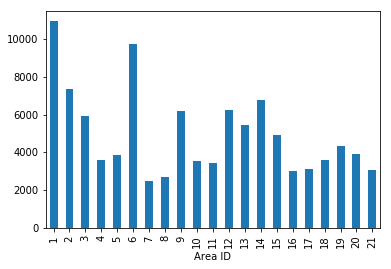

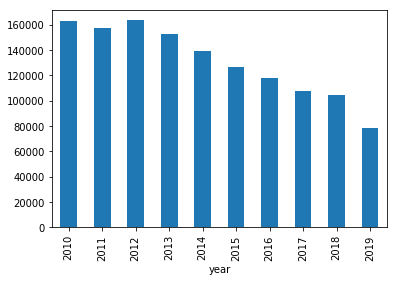

129608

In [44]:
#The area with the most arrests in 2018
plt.clf()
df=arrests[arrests['year']==2018].groupby('Area ID').size().plot(kind='bar')
plt.show()
plt.clf()
df=arrests.groupby('year').size().plot(kind='bar')
plt.show()
len(arrests[arrests['Area ID']==1 && arrests['year']==2018])

print(":\_",len(arrests[arrests['Area ID']==1]))

In [24]:
# What is the 95% quantile of the age of the arrestee in 2018?
# arrests_2018['Charge Group Description'][100:150]
mylist=['Vehicle Theft','Robbery','Burglary','  Receive Stolen Property']
# If case sensitive   
df_1=arrests_2018[arrests_2018['Charge Description'].str.lower().isin([x.lower() for x in mylist])]
#OR if not case senstive 
df1=arrests_2018[arrests_2018['Charge Description'].isin(mylist)]
p = np.percentile(df_1['Age'], 95)
print(p)

53.0


In [141]:
#For this question, calculate the Z-score of the average age for each charge group. 
#Report the largest absolute value among the calculated Z-scores.

df_2=arrests_2018[arrests_2018['Charge Group Description'].notnull()]
# Do not consider "Pre-Delinquency" and "Non-Criminal Detention" as these charge groups are reserved for minors
mylist_to_exclude=["Pre-Delinquency","Non-Criminal Detention"]
df_2=df_2[df_2['Charge Group Description'].isin(mylist_to_exclude)==False]

df_3=df_2.groupby('Charge Group Description')['Age'].mean()
zscore = lambda x: (x - np.mean(x)) / np.std(x) ;
abs(zscore(df_3))
print("The highest z-score belongs to drunkness ",max(abs(zscore(df_3))))

The highest z-score belongs to drunkness  2.1717481576567237


In [202]:
# Fellony arrest incident 2010 
fellony_df=arrests[arrests['Arrest Type Code']=='F']
print(fellony_df.shape)
print("Fellowny arrests in 2010",len(arrests[(arrests['year']==2010) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2011",len(arrests[(arrests['year']==2011) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2012",len(arrests[(arrests['year']==2012) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2013",len(arrests[(arrests['year']==2013) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2014",len(arrests[(arrests['year']==2014) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2015",len(arrests[(arrests['year']==2015) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2016",len(arrests[(arrests['year']==2016) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2017",len(arrests[(arrests['year']==2017) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2018",len(arrests[(arrests['year']==2018) & (arrests['Arrest Type Code']=='F')]))
print("Fellowny arrests in 2019",len(arrests[(arrests['day']==1) & (arrests['month']==1) &(arrests['year']==2019) & (arrests['Arrest Type Code']=='F')]))
#
def linreg(X, Y):
    """
    return a,b in solution to y = ax + b such that root mean square distance between trend line and original points is minimized
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y
    det = Sxx * N - Sx * Sx
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det


y=[51157, 49830,50610,47882,45878,35709,36880,35974,34948]
x=[2010,2011,2012,2013,2014,2015,2016,2017,2018]

#---------------------------#
a,b = linreg(x,y)
a,b
extrapolatedtrendline=a*2019+b;
extrapolatedtrendline

(388962, 20)
Fellowny arrests in 2010 51157
Fellowny arrests in 2011 49830
Fellowny arrests in 2012 50610
Fellowny arrests in 2013 47882
Fellowny arrests in 2014 45878
Fellowny arrests in 2015 35709
Fellowny arrests in 2016 36880
Fellowny arrests in 2017 35974
Fellowny arrests in 2018 34948
Fellowny arrests in 2019 94


31037.80555555597

In [587]:
# arrestLocation
from ast import literal_eval as make_tuple
df=arrests_2018['Location'].apply(lambda x: make_tuple(x))
print("Total number of records before cleaning the (0,0)",df.shape)

df=df[df!=(0,0)]
print("Total number of records", df.shape)


lat1=(34.050536) #Latitude of Bradbury building
long1=(-118.247861) #Longitude of Bradbury building

from math import sin, cos, sqrt, atan2, radians

# # approximate radius of earth in km
R = 6371.0
df=pd.DataFrame(df.values.tolist(), index=df.index)
lat2=np.array(df.iloc[:, [0]])
long2=np.array(df.iloc[:, [1]])

    
    

import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

dist=[]
for i in range(1,len(lat2)):
    origin=(lat1,long1)
    destination=(lat2[i],long2[i])
    dist.append(distance(origin,destination))
    
dist=np.array(dist)
print("distance less 2 KM from the building ",len(dist[dist<=2.0]))


Total number of records before cleaning the (0,0) (104277,)
Total number of records (104260,)
distance less 2 KM from the building  11461
